# PROYECTO No. 1 MODELOS DE REGRESIÓN LINEAL

### 1 .Importando Paquetes necesarios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 1.1 .Importando data set y agregando nombre de columnas

In [2]:
data_frame = np.load('D:/MAESTRIA CIENCIA DE DATOS/1. CIENCIA DE DATOS EN PHYTON/TAREAS/PROYECTO 1/proyecto_training_data.npy')
nombre_columnas=['precio_venta','calificacion_general','primer_nivel_m2','cantidad_cuartos','año_construccion','pies_calle']
data_set=pd.DataFrame(data_frame, columns=nombre_columnas)
data_set

,precio_venta,calificacion_general,primer_nivel_m2,cantidad_cuartos,año_construccion,pies_calle
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


##### 1.2 Revisando cantidad de Nan

In [3]:
Nan = data_set.isna().mean() * 100
print("Porcentaje de NaN por columna:")
print(Nan)

Porcentaje de NaN por columna:
precio_venta             0.000000
calificacion_general     0.000000
primer_nivel_m2          0.000000
cantidad_cuartos         0.000000
año_construccion         0.000000
pies_calle              17.739726
dtype: float64


##### 1.3 Interpolando valores Nan

Unicamente tenemos una columna con valores vacios, aplicaremos una interpolacion lineal para rellenar estos valores y no sea necesario elimiar el 17% de los registros que afectarian las demas variables que si tienen datos registrados

In [4]:
data_set['pies_calle'] = data_set['pies_calle'].interpolate(method='linear')

In [5]:
Nan = data_set.isna().mean() * 100
print("Porcentaje de NaN por columna:")
print(Nan)

Porcentaje de NaN por columna:
precio_venta            0.0
calificacion_general    0.0
primer_nivel_m2         0.0
cantidad_cuartos        0.0
año_construccion        0.0
pies_calle              0.0
dtype: float64


### 2. Separando Data_set de entrenamiento y de validacion

Data set de entrenamiento = 80%  = 1168 registros  
Data set de validacion = 20% = 292 registros

In [6]:
#calculando la cantidad de lineas
cant_lineas_entrenamiento = int(len(data_set)*0.8)
cant_lineas_validacion = int(len(data_set)*0.2)
# a partir de la cantidad de lineas, tomar indices aleatorios
indices = np.random.permutation(len(data_set))
# Extrayendo data set entrenamiento
entrenamiento = indices[:cant_lineas_entrenamiento]
data_set_entrenamiento = data_set.iloc[entrenamiento]
# Extrayendo data set validacion
validacion = indices[:cant_lineas_validacion]
data_set_validacion = data_set.iloc[validacion]

In [7]:
# data set entrenamiento
data_set_entrenamiento

,precio_venta,calificacion_general,primer_nivel_m2,cantidad_cuartos,año_construccion,pies_calle
969,140000.0,6.0,1095.0,6.0,1958.0,75.0
536,188000.0,7.0,880.0,8.0,1998.0,57.0
515,402861.0,10.0,2020.0,9.0,2009.0,94.0
1185,104900.0,5.0,949.0,7.0,1924.0,60.0
875,303477.0,8.0,1184.0,11.0,2007.0,75.0
...,...,...,...,...,...,...
663,137500.0,4.0,1181.0,6.0,1972.0,90.0
228,125000.0,5.0,912.0,5.0,1967.0,70.0
1023,191000.0,7.0,1504.0,7.0,2005.0,43.0
967,135000.0,5.0,1098.0,6.0,1955.0,90.0


In [8]:
# data set validacion
data_set_validacion

,precio_venta,calificacion_general,primer_nivel_m2,cantidad_cuartos,año_construccion,pies_calle
969,140000.0,6.0,1095.0,6.0,1958.0,75.0
536,188000.0,7.0,880.0,8.0,1998.0,57.0
515,402861.0,10.0,2020.0,9.0,2009.0,94.0
1185,104900.0,5.0,949.0,7.0,1924.0,60.0
875,303477.0,8.0,1184.0,11.0,2007.0,75.0
...,...,...,...,...,...,...
1440,191000.0,6.0,1423.0,11.0,1922.0,79.0
475,132500.0,5.0,970.0,5.0,1963.0,80.0
91,98600.0,5.0,1235.0,6.0,1961.0,85.0
149,115000.0,5.0,896.0,7.0,1936.0,91.5


### 3.Analisis exploratorio de datos

In [9]:
media_datos = round(data_set_entrenamiento.mean(),2)
maximo_datos = round(data_set_entrenamiento.max(),2)
minimo_datos = round(data_set_entrenamiento.min(),2)
rango_datos = round(np.ptp(data_set_entrenamiento.values),2)
desviacion_datos = round(data_set_entrenamiento.std(),2)
resultados = pd.DataFrame({'Media': media_datos, 
                           'Máximo': maximo_datos, 
                           'Mínimo': minimo_datos, 
                           'Rango':maximo_datos- minimo_datos,
                           'Desviación Estándar': desviacion_datos})
resultados

,Media,Máximo,Mínimo,Rango,Desviación Estándar
precio_venta,180310.95,755000.0,34900.0,720100.0,79836.80
calificacion_general,6.08,10.0,1.0,9.0,1.39
primer_nivel_m2,1158.56,4692.0,334.0,4358.0,379.23
cantidad_cuartos,6.50,14.0,2.0,12.0,1.63
año_construccion,1970.92,2010.0,1872.0,138.0,30.30
pies_calle,70.26,313.0,21.0,292.0,23.58


### 3.Histograma para cada variable

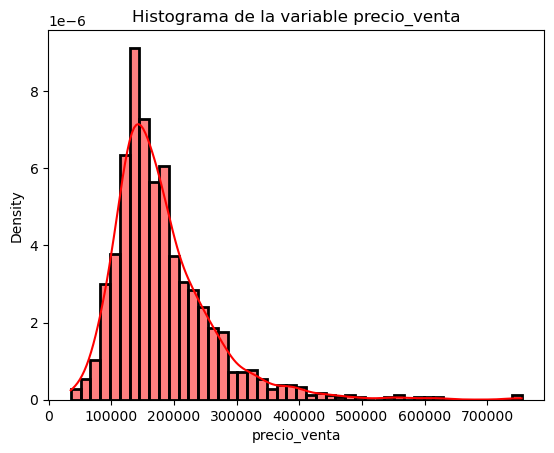

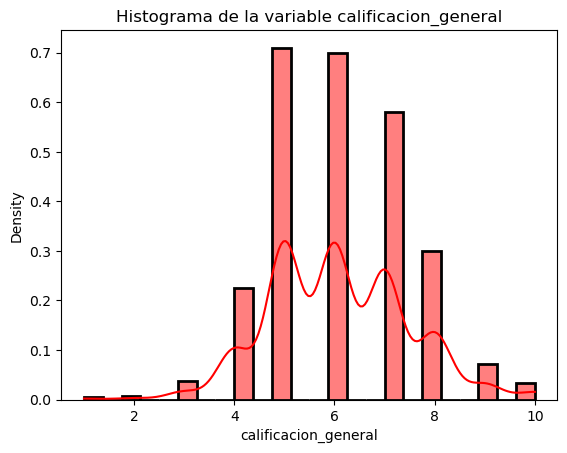

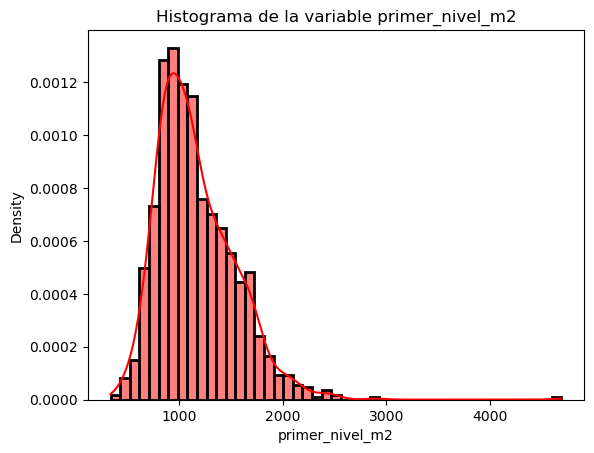

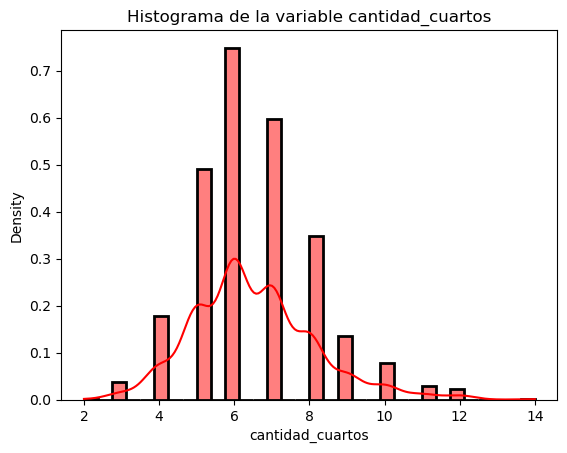

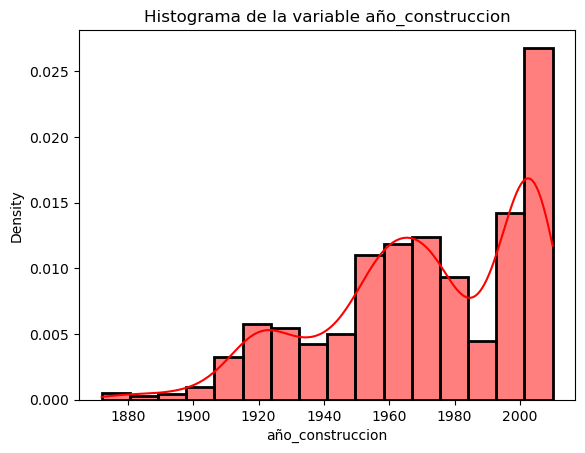

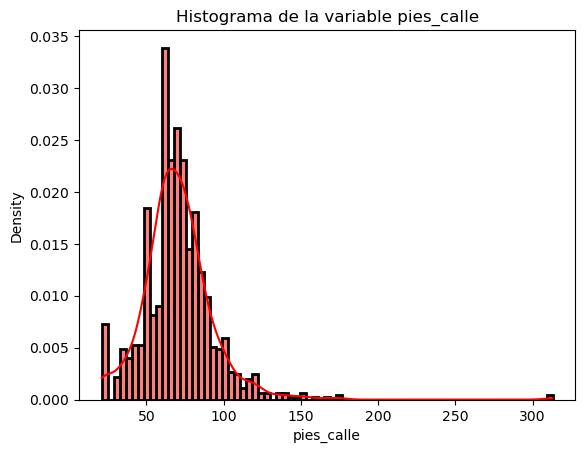

In [47]:
for col in data_set_entrenamiento.columns:
    sns.histplot(data=data_set_entrenamiento, x=col, color = 'red', kde = True, linewidth=2, stat="density" )
    plt.title(f'Histograma de la variable {col}') 
    plt.show()

### 5. Variables dependientes e independientes

Para este estudio definiremos la variable dendiente **Y** como *precio de venta* por que nos interesa ver como influye las demas variables en el precio de venta de una casa. Por lo que las variables independientes o regresoras seran **X** como *calificacion_general*, *primer_nivel_m2*, *cantidad_cuartos*, *año_construccion* y *pies_calle*, se buscará cual de todas esas variables tiene un mejor coeficiente de correlacion lineal con la dependiete y sobre eso se trabajara.

- Calcular el coeficiente de correlacion entre la variable dependiente con cada uno de las independientes

In [45]:
#Funcion que nos ayudara a calcular el coeficiente de correlacion
def coeficiente_correlacion(x,y):
    covarianza = np.cov(x, y)[0, 1]
    desviacion_estandar_x = np.std(x)
    desviacion_estandar_y = np.std(y)
    coeficiente = covarianza / (desviacion_estandar_x * desviacion_estandar_y)
    return coeficiente

#Columas las variables independientes y dependiente
independientes = ["calificacion_general", "primer_nivel_m2", "cantidad_cuartos", "año_construccion", "pies_calle"]
dependiente = data_set_entrenamiento['precio_venta']

#Diccionario de coeficientes, para imprimir luego en la gráficas de dispersion
coeficientes_calculados = {} 

for variable in independientes:
    x =data_set_entrenamiento[variable]
    funcion = coeficiente_correlacion(x,dependiente)
    coeficientes_calculados[variable] = funcion
    print(f'El coeficiente de correlancion entre el Precio de venta y {variable} es de {round(funcion,2)} ')


El coeficiente de correlancion entre el Precio de venta y calificacion_general es de 0.79 
El coeficiente de correlancion entre el Precio de venta y primer_nivel_m2 es de 0.61 
El coeficiente de correlancion entre el Precio de venta y cantidad_cuartos es de 0.53 
El coeficiente de correlancion entre el Precio de venta y año_construccion es de 0.51 
El coeficiente de correlancion entre el Precio de venta y pies_calle es de 0.32 


- Graficar cada variable independiente con la dependiente para "visualmente" obervar patrones y relacion con un gráfico de dispersión

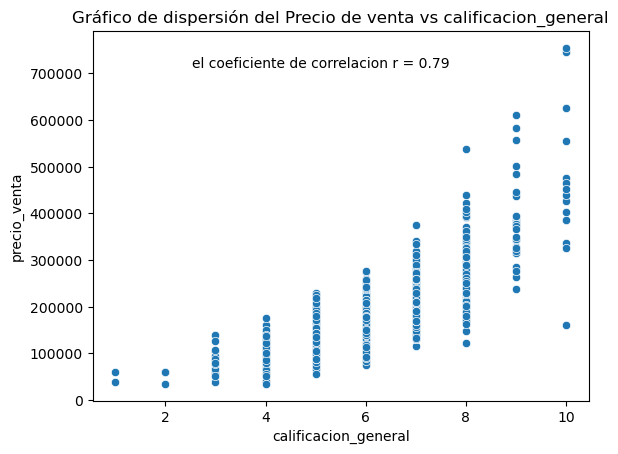

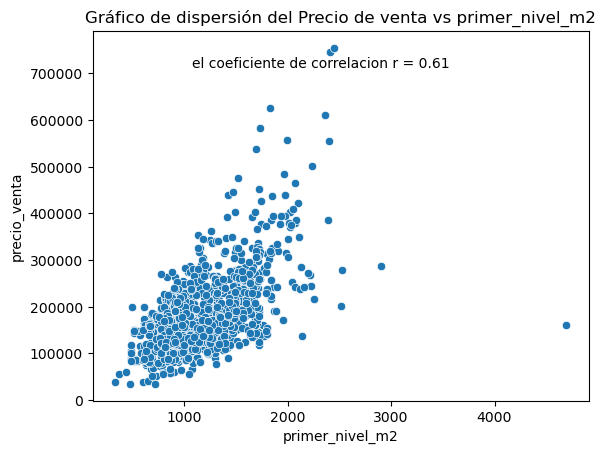

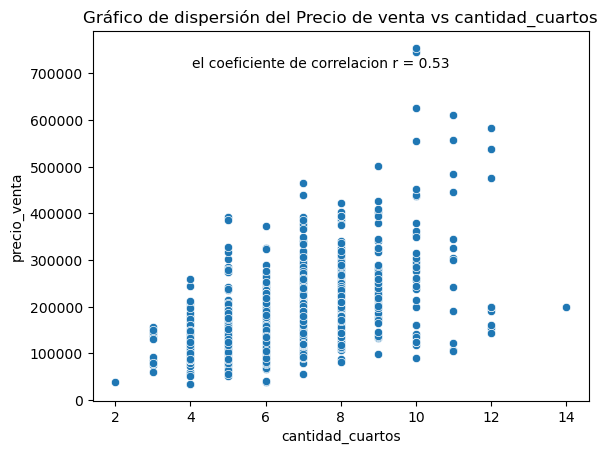

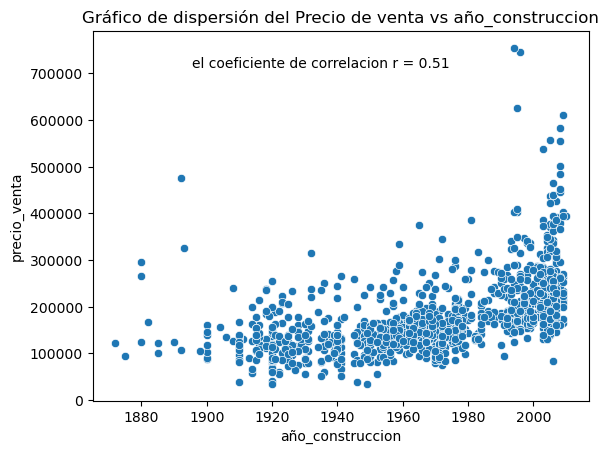

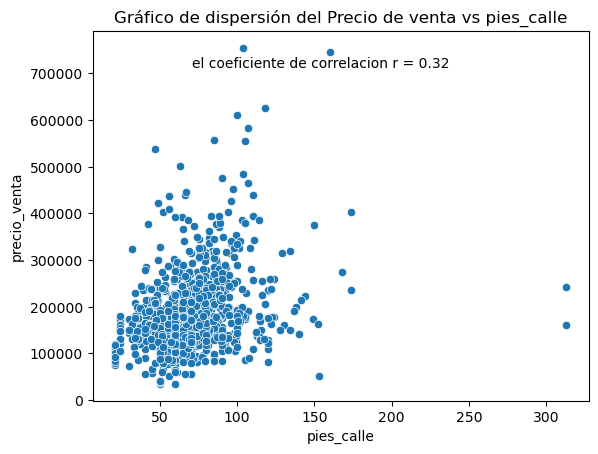

In [46]:
for variable in independientes:
  x = data_set_entrenamiento[variable]
  sns.scatterplot(x=x, y=dependiente)
  plt.title(f"Gráfico de dispersión del Precio de venta vs {variable}")
  plt.annotate(f"el coeficiente de correlacion r = {round(coeficientes_calculados[variable],2)}", xy=(0.2, 0.9), xycoords="axes fraction") #xycoords= axes fraction nos asegura que la anotacion no se mueva independientemente de la escala
  plt.show()

- Como podemos notar en las graficas de dispersión y el coeficiente de correlación calculado, las variables que mejor se relacion tiene con la variable de interes Y son:    
  
    - X1: "calificacion_general" con un coeficiente de 0.79    
    - X2: "primer_nivel_m2" con un coeficiente de 0.61